# 用pytorch对Fashion-MNIST数据集中的时尚物品进行分类

# 1 下载Fasion-MNIST数据集

In [3]:
import torch  # 导入pytorch
from torch import nn, optim  # 导入神经网络与优化器对应的类
import torch.nn.functional as F 
from torchvision import datasets, transforms ## 导入数据集与数据预处理的方法

In [4]:
# 数据预处理：标准化图像数据，使得灰度数据在-1到+1之间
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

# 下载Fashion-MNIST训练集数据，并构建训练集数据载入器trainloader,每次从训练集中载入64张图片，每次载入都打乱顺序
trainset = datasets.FashionMNIST('dataset/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# 下载Fashion-MNIST测试集数据，并构建测试集数据载入器trainloader,每次从测试集中载入64张图片，每次载入都打乱顺序
testset = datasets.FashionMNIST('dataset/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████████████████████▉| 26419200/26421880 [07:01<00:00, 30937.65it/s]

Extracting dataset/FashionMNIST\raw\train-images-idx3-ubyte.gz



0it [00:00, ?it/s]
 56%|██████████████████▎              | 16384/29515 [00:00<00:00, 83645.42it/s]
32768it [00:00, 42307.25it/s]                                                  

Extracting dataset/FashionMNIST\raw\train-labels-idx1-ubyte.gz



0it [00:00, ?it/s]
 83%|████████████████████████     | 3670016/4422102 [00:16<00:12, 59407.32it/s]
26427392it [07:20, 30937.65it/s]                                               
100%|████████████████████████████▉| 4415488/4422102 [00:47<00:00, 96108.55it/s]

Extracting dataset/FashionMNIST\raw\t10k-images-idx3-ubyte.gz




0it [00:00, ?it/s]

  0%|                                                 | 0/5148 [00:00<?, ?it/s]

8192it [00:00, 12216.18it/s]                                                   

Extracting dataset/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!



4423680it [01:07, 96108.55it/s]                                                

## 显示图片

这张图片对应的标签是 外套


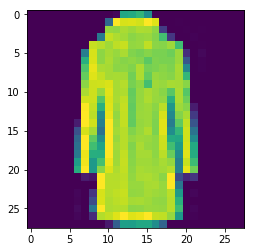

In [5]:
image, label = next(iter(trainloader))

# image图片中有64张图片，我们查看索引为2的图片
imagedemo = image[3]
imagedemolabel = label[3]

imagedemo = imagedemo.reshape((28,28))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(imagedemo)

labellist = ['T恤','裤子','套衫','裙子','外套','凉鞋','汗衫','运动鞋','包包','靴子']
print(f'这张图片对应的标签是 {labellist[imagedemolabel]}')

# 2 打开数据集中的图片

In [6]:
image, label = next(iter(trainloader))

In [7]:
image.shape

torch.Size([64, 1, 28, 28])

image包含了64张28 * 28的灰度图片，1代表单通道，也就是灰度

In [8]:
label

tensor([2, 2, 3, 5, 4, 2, 6, 4, 5, 1, 6, 5, 1, 6, 4, 6, 6, 3, 4, 2, 2, 0, 2, 7,
        9, 5, 8, 2, 5, 7, 1, 5, 0, 7, 3, 9, 6, 2, 2, 7, 1, 1, 4, 0, 8, 3, 7, 9,
        9, 9, 8, 8, 9, 8, 7, 7, 6, 9, 9, 7, 4, 0, 7, 2])

label包含了image里面64张图片对应的标签

| 标注编号 | 描述 |
| --- | --- |
| 0 | T-shirt/top（T恤）|
| 1 | Trouser（裤子）|
| 2 | Pullover（套衫）|
| 3 | Dress（裙子）|
| 4 | Coat（外套）|
| 5 | Sandal（凉鞋）|
| 6 | Shirt（汗衫）|
| 7 | Sneaker（运动鞋）|
| 8 | Bag（包）|
| 9 | Ankle boot（踝靴）|

## 打开训练集中的一张图片看看

In [9]:
imagedemo = image[2]
imagedemolabel = label[2]

In [10]:
imagedemo.shape

torch.Size([1, 28, 28])

In [11]:
imagedemo = imagedemo.reshape((28,28))

In [12]:
imagedemo.shape

torch.Size([28, 28])

In [13]:
imagedemolabel

tensor(3)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

这张图片对应的标签是 裙子


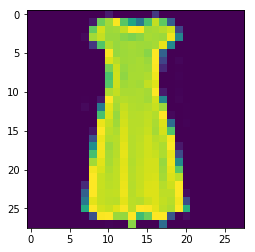

In [15]:
plt.imshow(imagedemo)

labellist = ['T恤','裤子','套衫','裙子','外套','凉鞋','汗衫','运动鞋','包包','靴子']
print(f'这张图片对应的标签是 {labellist[imagedemolabel]}')

## 查看一张图片和标签完整的代码

这张图片对应的标签是 运动鞋


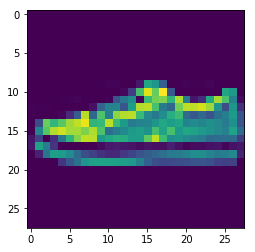

In [16]:
image, label = next(iter(trainloader))

# image图片中有64张图片，我们查看索引为2的图片
imagedemo = image[3]
imagedemolabel = label[3]

imagedemo = imagedemo.reshape((28,28))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(imagedemo)

labellist = ['T恤','裤子','套衫','裙子','外套','凉鞋','汗衫','运动鞋','包包','靴子']
print(f'这张图片对应的标签是 {labellist[imagedemolabel]}')

# 2 搭建并训练四层全连接神经网络

神经网络的输入为28 * 28 = 784 个像素<br>
第一个隐含层包含256个神经元<br>
第二个隐含层包含128个神经元<br>
第三个隐含层包含64个神经元<br>
输出层输出10个结果，对应图片的10种分类<br>

In [17]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [18]:
# 对上面定义的Classifier类进行实例化
model = Classifier()

# 定义损失函数为负对数损失函数
criterion = nn.NLLLoss()

# 优化方法为Adam梯度下降方法，学习率为0.003
optimizer = optim.Adam(model.parameters(), lr=0.003)

# 对训练集的全部数据学习15遍，这个数字越大，训练时间越长
epochs = 15

# 将每次训练的训练误差和测试误差存储在这两个列表里，后面绘制误差变化折线图用
train_losses, test_losses = [], []

print('开始训练')
for e in range(epochs):
    running_loss = 0
    
    # 对训练集中的所有图片都过一遍
    for images, labels in trainloader:
        # 将优化器中的求导结果都设为0，否则会在每次反向传播之后叠加之前的
        optimizer.zero_grad()
        
        # 对64张图片进行推断，计算损失函数，反向传播优化权重，将损失求和
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # 每次学完一遍数据集，都进行以下测试操作
    else:
        test_loss = 0
        accuracy = 0
        # 测试的时候不需要开自动求导和反向传播
        with torch.no_grad():
            # 关闭Dropout
            model.eval()
            
            # 对测试集中的所有图片都过一遍
            for images, labels in testloader:
                # 对传入的测试集图片进行正向推断、计算损失，accuracy为测试集一万张图片中模型预测正确率
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                
                # 等号右边为每一批64张测试图片中预测正确的占比
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        # 恢复Dropout
        model.train()
        # 将训练误差和测试误差存在两个列表里，后面绘制误差变化折线图用
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("训练集学习次数: {}/{}.. ".format(e+1, epochs),
              "训练误差: {:.3f}.. ".format(running_loss/len(trainloader)),
              "测试误差: {:.3f}.. ".format(test_loss/len(testloader)),
              "模型分类准确率: {:.3f}".format(accuracy/len(testloader)))

开始训练
训练集学习次数: 1/15..  训练误差: 0.512..  测试误差: 0.460..  模型分类准确率: 0.833
训练集学习次数: 2/15..  训练误差: 0.391..  测试误差: 0.404..  模型分类准确率: 0.851
训练集学习次数: 3/15..  训练误差: 0.354..  测试误差: 0.395..  模型分类准确率: 0.861
训练集学习次数: 4/15..  训练误差: 0.331..  测试误差: 0.389..  模型分类准确率: 0.866
训练集学习次数: 5/15..  训练误差: 0.318..  测试误差: 0.368..  模型分类准确率: 0.868
训练集学习次数: 6/15..  训练误差: 0.305..  测试误差: 0.395..  模型分类准确率: 0.864
训练集学习次数: 7/15..  训练误差: 0.292..  测试误差: 0.363..  模型分类准确率: 0.869
训练集学习次数: 8/15..  训练误差: 0.287..  测试误差: 0.374..  模型分类准确率: 0.873
训练集学习次数: 9/15..  训练误差: 0.277..  测试误差: 0.398..  模型分类准确率: 0.869
训练集学习次数: 10/15..  训练误差: 0.268..  测试误差: 0.358..  模型分类准确率: 0.877
训练集学习次数: 11/15..  训练误差: 0.263..  测试误差: 0.375..  模型分类准确率: 0.876
训练集学习次数: 12/15..  训练误差: 0.257..  测试误差: 0.367..  模型分类准确率: 0.877
训练集学习次数: 13/15..  训练误差: 0.249..  测试误差: 0.371..  模型分类准确率: 0.875
训练集学习次数: 14/15..  训练误差: 0.245..  测试误差: 0.375..  模型分类准确率: 0.880
训练集学习次数: 15/15..  训练误差: 0.236..  测试误差: 0.393..  模型分类准确率: 0.876


# 3 验证模型效果

## 绘制训练误差和测试误差随学习次数增加的变化

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

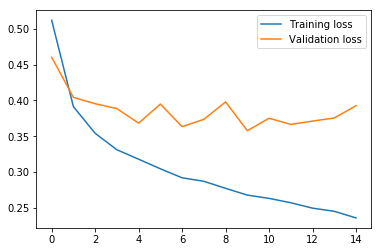

In [20]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend()

神经网络猜测图片里是 T恤，概率为54.53718304634094%


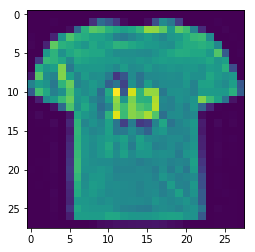

In [57]:
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
img = img.reshape((28,28)).numpy()
plt.imshow(img)

# 将测试图片转为一维的列向量
img = torch.from_numpy(img)
img = img.view(1, 784)

# 进行正向推断，预测图片所在的类别
with torch.no_grad():
    output = model.forward(img)
ps = torch.exp(output)

top_p, top_class = ps.topk(1, dim=1)
labellist = ['T恤','裤子','套衫','裙子','外套','凉鞋','汗衫','运动鞋','包包','靴子']
prediction = labellist[top_class]
probability = float(top_p)
print(f'神经网络猜测图片里是 {prediction}，概率为{probability*100}%')

# 4 采用Dropout方法防止过拟合

In [58]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        # 构造Dropout方法，在每次训练过程中都随机“掐死”百分之二十的神经元，防止过拟合。
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        # 确保输入的tensor是展开的单列数据，把每张图片的通道、长度、宽度三个维度都压缩为一列
        x = x.view(x.shape[0], -1)
        
        # 在训练过程中对隐含层神经元的正向推断使用Dropout方法
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        # 在输出单元不需要使用Dropout方法
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [59]:
# 对上面定义的Classifier类进行实例化
model = Classifier()

# 定义损失函数为负对数损失函数
criterion = nn.NLLLoss()

# 优化方法为Adam梯度下降方法，学习率为0.003
optimizer = optim.Adam(model.parameters(), lr=0.003)

# 对训练集的全部数据学习15遍，这个数字越大，训练时间越长
epochs = 15

# 将每次训练的训练误差和测试误差存储在这两个列表里，后面绘制误差变化折线图用
train_losses, test_losses = [], []

print('开始训练')
for e in range(epochs):
    running_loss = 0
    
    # 对训练集中的所有图片都过一遍
    for images, labels in trainloader:
        # 将优化器中的求导结果都设为0，否则会在每次反向传播之后叠加之前的
        optimizer.zero_grad()
        
        # 对64张图片进行推断，计算损失函数，反向传播优化权重，将损失求和
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # 每次学完一遍数据集，都进行以下测试操作
    else:
        test_loss = 0
        accuracy = 0
        # 测试的时候不需要开自动求导和反向传播
        with torch.no_grad():
            # 关闭Dropout
            model.eval()
            
            # 对测试集中的所有图片都过一遍
            for images, labels in testloader:
                # 对传入的测试集图片进行正向推断、计算损失，accuracy为测试集一万张图片中模型预测正确率
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                
                # 等号右边为每一批64张测试图片中预测正确的占比
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        # 恢复Dropout
        model.train()
        # 将训练误差和测试误差存在两个列表里，后面绘制误差变化折线图用
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("训练集学习次数: {}/{}.. ".format(e+1, epochs),
              "训练误差: {:.3f}.. ".format(running_loss/len(trainloader)),
              "测试误差: {:.3f}.. ".format(test_loss/len(testloader)),
              "模型分类准确率: {:.3f}".format(accuracy/len(testloader)))

开始训练
训练集学习次数: 1/15..  训练误差: 0.608..  测试误差: 0.520..  模型分类准确率: 0.811
训练集学习次数: 2/15..  训练误差: 0.482..  测试误差: 0.454..  模型分类准确率: 0.834
训练集学习次数: 3/15..  训练误差: 0.450..  测试误差: 0.424..  模型分类准确率: 0.850
训练集学习次数: 4/15..  训练误差: 0.434..  测试误差: 0.416..  模型分类准确率: 0.853
训练集学习次数: 5/15..  训练误差: 0.424..  测试误差: 0.412..  模型分类准确率: 0.855
训练集学习次数: 6/15..  训练误差: 0.411..  测试误差: 0.405..  模型分类准确率: 0.851
训练集学习次数: 7/15..  训练误差: 0.407..  测试误差: 0.406..  模型分类准确率: 0.860
训练集学习次数: 8/15..  训练误差: 0.401..  测试误差: 0.403..  模型分类准确率: 0.853
训练集学习次数: 9/15..  训练误差: 0.391..  测试误差: 0.392..  模型分类准确率: 0.861
训练集学习次数: 10/15..  训练误差: 0.390..  测试误差: 0.395..  模型分类准确率: 0.862
训练集学习次数: 11/15..  训练误差: 0.385..  测试误差: 0.404..  模型分类准确率: 0.857
训练集学习次数: 12/15..  训练误差: 0.381..  测试误差: 0.391..  模型分类准确率: 0.863
训练集学习次数: 13/15..  训练误差: 0.382..  测试误差: 0.400..  模型分类准确率: 0.865
训练集学习次数: 14/15..  训练误差: 0.381..  测试误差: 0.377..  模型分类准确率: 0.868
训练集学习次数: 15/15..  训练误差: 0.372..  测试误差: 0.379..  模型分类准确率: 0.869


In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

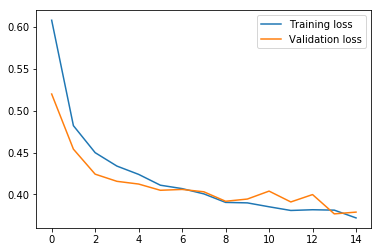

In [61]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend()

神经网络猜测图片里是 T恤，概率为97.91023135185242%


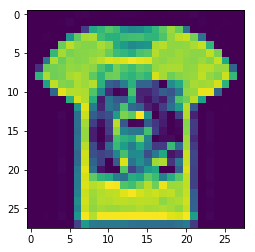

In [105]:
model.eval()
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
img = img.reshape((28,28)).numpy()
plt.imshow(img)

# 将测试图片转为一维的列向量
img = torch.from_numpy(img)
img = img.view(1, 784)

# 进行正向推断，预测图片所在的类别
with torch.no_grad():
    output = model.forward(img)
ps = torch.exp(output)

top_p, top_class = ps.topk(1, dim=1)
labellist = ['T恤','裤子','套衫','裙子','外套','凉鞋','汗衫','运动鞋','包包','靴子']
prediction = labellist[top_class]
probability = float(top_p)
print(f'神经网络猜测图片里是 {prediction}，概率为{probability*100}%')